# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fayza Azzahra
- **Email:** fayzaazz05@gmail.com
- **ID Dicoding:** CDCC204D6X2652


## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pada jam berapa jumlah penyewaan sepeda paling tinggi dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [5]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset terdiri dari data penyewaan sepeda per hari dan per jam
- Terdapat variabel seperti musim, suhu, kelembaban, kondisi cuaca, dan jumlah penyewaan.

### Assessing Data

In [9]:
day_df.info()
day_df.isna().sum()
day_df.duplicated().sum()

hour_df.info()
hour_df.isna().sum()
hour_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

np.int64(0)

**Insight:**
- Tidak ditemukan missing value pada dataset.
- Tidak terdapat data duplikat.
- Tipe data sebagian besar sudah sesuai.

### Cleaning Data

In [11]:
# Mengubah tipe data tanggal
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

**Insight:**
- Kolom tanggal berhasil dikonversi ke format datetime sehingga memudahkan analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore Data Harian

In [12]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
day_df.groupby("weathersit")["cnt"].mean().sort_values(ascending=False)

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [14]:
hour_df.groupby("hr")["cnt"].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- Rata-rata penyewaan sepeda berbeda berdasarkan kondisi cuaca
- Penyewaan sepeda menunjukkan pola tertentu berdasarkan jam dalam sehari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca terhadap Penyewaan Sepeda

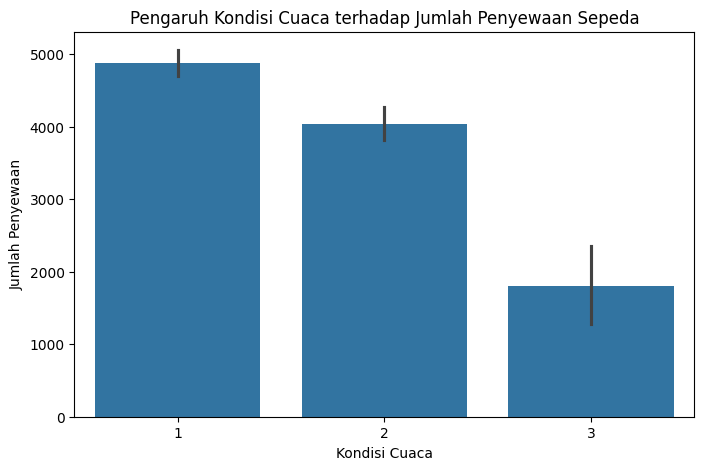

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x='weathersit', y='cnt', data=day_df)
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

### Pertanyaan 2: Jam dengan Penyewaan Sepeda Tertinggi

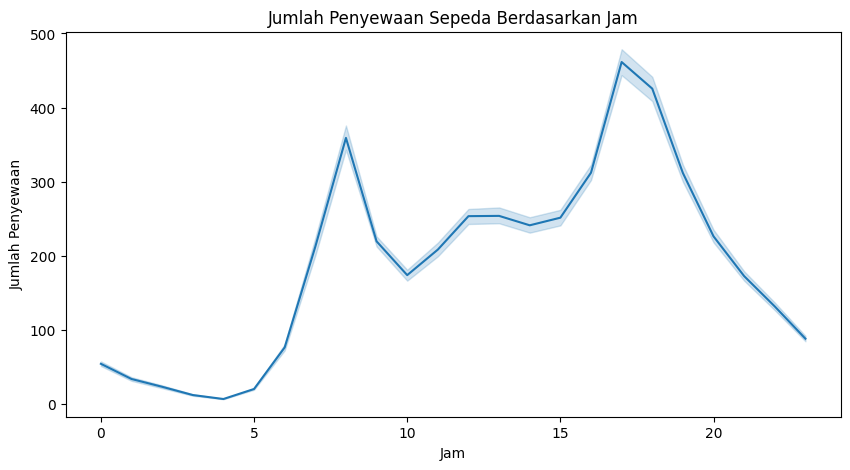

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(x='hr', y='cnt', data=hour_df)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah
- Terdapat dua puncak penyewaan yaitu pada pagi hari dan sore hari yang berkaitan dengan aktivitas kerja.

## Analisis Lanjutan (Opsional)

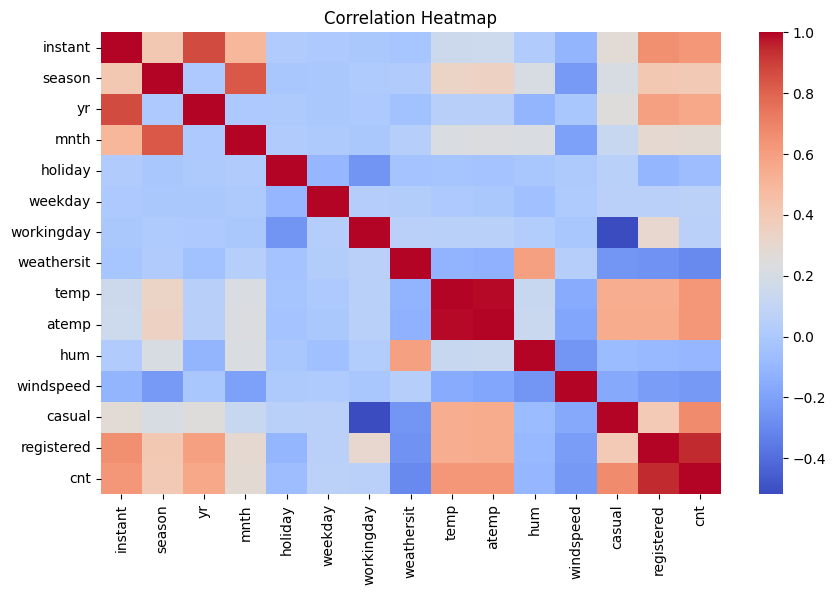

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(day_df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Suhu memiliki korelasi positif terhadap jumlah penyewaan sepeda.
- Kelembaban memiliki korelasi negatif terhadap jumlah penyewaan.

## Conclusion

- **Conclusion Pertanyaan 1:**
Kondisi cuaca berpengaruh terhadap jumlah penyewaan sepeda. Cuaca cerah menghasilkan jumlah penyewaan tertinggi dibandingkan kondisi cuaca lainnya.

- **Conclusion Pertanyaan 2:**
Jumlah penyewaan sepeda paling tinggi terjadi pada jam sibuk yaitu pagi hari sekitar jam berangkat kerja dan sore hari sekitar jam pulang kerja.